In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("loan_data_1.csv")

In [3]:
dataset.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(381, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             376 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         373 non-null    object 
 5   Education          375 non-null    object 
 6   Self_Employed      360 non-null    object 
 7   ApplicantIncome    369 non-null    float64
 8   CoapplicantIncome  363 non-null    float64
 9   LoanAmount         373 non-null    float64
 10  Loan_Amount_Term   370 non-null    float64
 11  Credit_History     351 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 41.8+ KB


In [6]:
dataset.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,369.000000,363.000000,373.000000,370.000000,351.000000
mean,190.000000,3563.422764,1267.005289,104.914209,340.864865,0.837607
std,110.129469,1427.371257,2388.048316,28.484822,68.549257,0.369338
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,95.000000,2583.000000,0.000000,90.000000,360.000000,1.000000
50%,190.000000,3326.000000,830.000000,110.000000,360.000000,1.000000
75%,285.000000,4226.000000,2008.000000,127.000000,360.000000,1.000000
max,380.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,54,3,57
1.0,52,242,294
All,106,245,351


<Axes: >

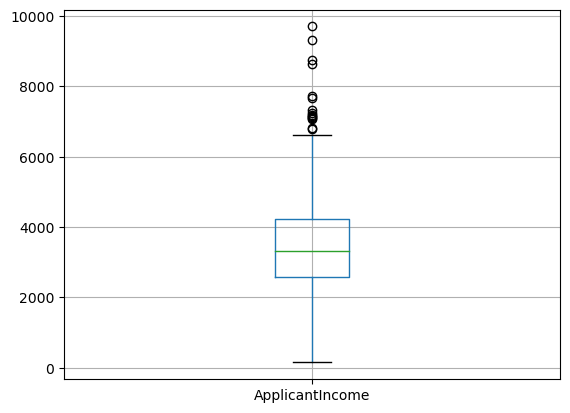

In [8]:
dataset.boxplot(column = 'ApplicantIncome')

<Axes: >

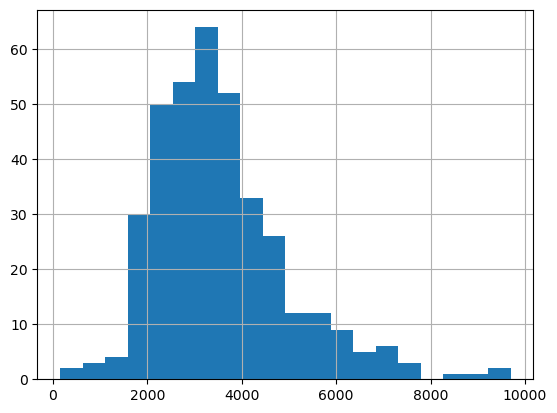

In [9]:
dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

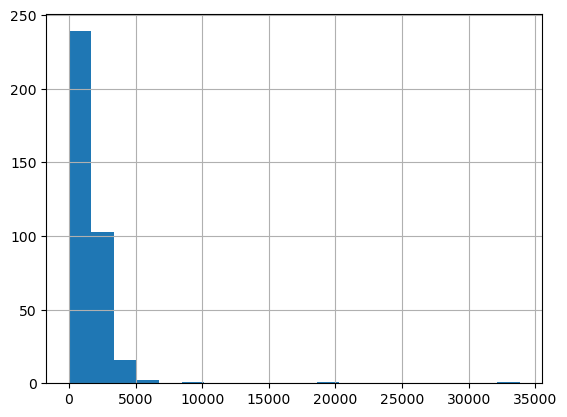

In [10]:
dataset['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

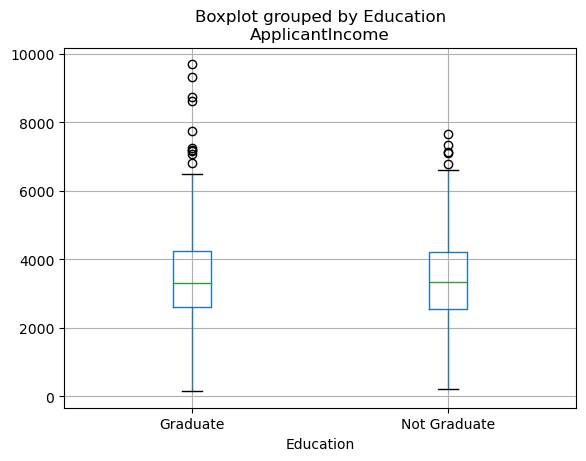

In [11]:
dataset.boxplot(column = 'ApplicantIncome', by = 'Education')

<Axes: >

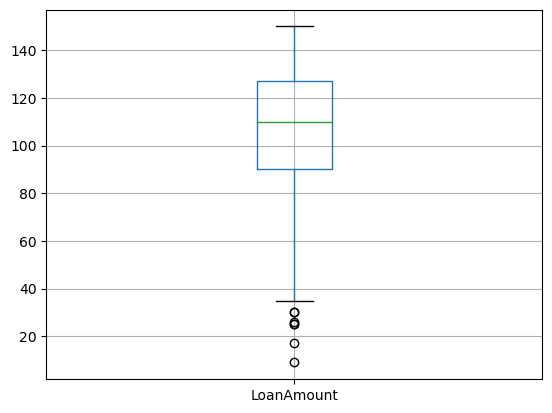

In [12]:
dataset.boxplot(column = 'LoanAmount')

<Axes: >

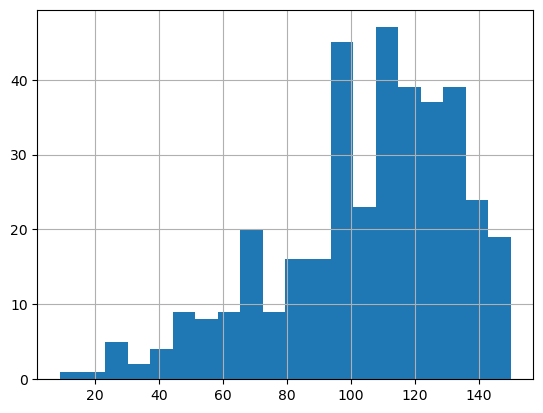

In [13]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

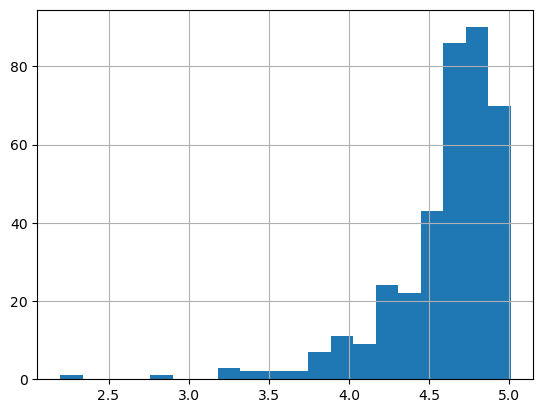

In [14]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [15]:
dataset.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
LoanAmount_log        8
dtype: int64

In [16]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace = True)

In [17]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace = True)

In [18]:
dataset['Education'].fillna(dataset['Education'].mode()[0], inplace = True)

In [19]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace = True)

In [20]:
dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].mean(), inplace = True)

In [21]:
dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace = True)

In [22]:
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace = True)
dataset['LoanAmount_log'].fillna(dataset['LoanAmount_log'].mean(), inplace = True)

In [23]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace = True)

In [24]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace = True)

In [25]:
dataset.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [26]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])

<Axes: >

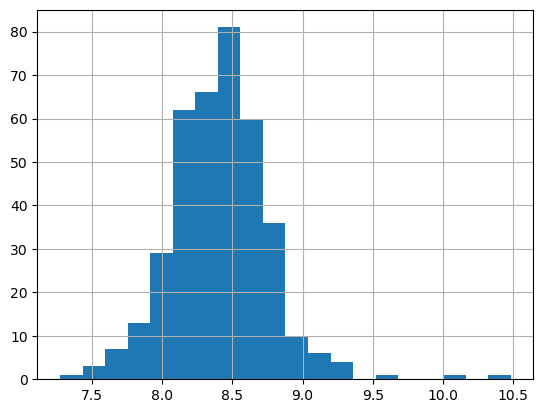

In [27]:
dataset['TotalIncome_log'].hist(bins=20)

In [28]:
dataset.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         381 non-null    int64  
 1   Loan_ID            381 non-null    object 
 2   Gender             381 non-null    object 
 3   Married            381 non-null    object 
 4   Dependents         381 non-null    object 
 5   Education          381 non-null    object 
 6   Self_Employed      381 non-null    object 
 7   ApplicantIncome    381 non-null    float64
 8   CoapplicantIncome  381 non-null    float64
 9   LoanAmount         381 non-null    float64
 10  Loan_Amount_Term   381 non-null    float64
 11  Credit_History     381 non-null    float64
 12  Property_Area      381 non-null    object 
 13  Loan_Status        381 non-null    object 
 14  LoanAmount_log     381 non-null    float64
 15  TotalIncome        381 non-null    float64
 16  TotalIncome_log    381 non

In [30]:
X = dataset.iloc[:, np.r_[2:13, 14:17]].values
y = dataset.iloc[:, 13].values

In [31]:
X

array([['Male', 'Yes', '1', ..., 4.852030263919617, 6091.0,
        8.714567550836485],
       ['Male', 'Yes', '0', ..., 4.189654742026425, 3000.0,
        8.006367567650246],
       ['Male', 'Yes', '0', ..., 4.787491742782046, 4941.0,
        8.50532301884575],
       ...,
       ['Female', 'No', '0', ..., 4.2626798770413155, 2900.0,
        7.9724660159745655],
       ['Male', 'Yes', '3+', ..., 3.6888794541139363, 4106.0,
        8.32020459757888],
       ['Female', 'No', '0', ..., 4.890349128221754, 4583.0,
        8.430109084509125]], dtype=object)

In [32]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [35]:
for i in range(0,5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [36]:
X_train[:,10] = labelencoder_X.fit_transform(X_train[:,10])

In [37]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [38]:
y_train

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [39]:
for i in range(0,5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])

In [40]:
X_test[:,10] = labelencoder_X.fit_transform(X_test[:,10])

In [41]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [42]:
X_test

array([[0, 0, 1, ..., 4.718498871295094, 3812.0, 8.245909264774093],
       [1, 0, 2, ..., 4.382026634673881, 3547.0, 8.173857454773621],
       [1, 0, 0, ..., 4.543294782270004, 3563.4227642276423,
        8.178476812574203],
       ...,
       [1, 1, 0, ..., 4.499809670330265, 4949.0, 8.506940814951886],
       [1, 1, 3, ..., 4.867534450455582, 5499.0, 8.612321536507814],
       [1, 1, 2, ..., 2.833213344056216, 2385.0, 7.776954403322442]],
      dtype=object)

In [43]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [44]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [45]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [47]:
from sklearn import metrics
print("The accuracy of Decision Tree is :", metrics.accuracy_score(y_pred,y_test))

The accuracy of Decision Tree is : 0.7922077922077922


In [48]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [49]:
y_pred = NBClassifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [50]:
print("The accuracy of Naive Bayes is :", metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is : 0.8051948051948052


In [51]:
testdata = pd.read_csv("loan_test_data.csv")

In [52]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125,360.0,1.0,Urban
1,LP001034,Male,No,1,Not Graduate,No,3596.0,0.0,100,240.0,NaN,Urban
2,LP001036,Female,No,0,Graduate,No,3510.0,0.0,76,360.0,0.0,Urban
3,LP001038,Male,Yes,0,Not Graduate,No,4887.0,0.0,133,360.0,1.0,Rural
4,LP001041,Male,Yes,0,Graduate,NaN,2600.0,3500.0,115,NaN,1.0,Urban


In [53]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            28 non-null     object 
 1   Gender             27 non-null     object 
 2   Married            28 non-null     object 
 3   Dependents         27 non-null     object 
 4   Education          27 non-null     object 
 5   Self_Employed      27 non-null     object 
 6   ApplicantIncome    27 non-null     float64
 7   CoapplicantIncome  26 non-null     float64
 8   LoanAmount         28 non-null     int64  
 9   Loan_Amount_Term   26 non-null     float64
 10  Credit_History     26 non-null     float64
 11  Property_Area      28 non-null     object 
dtypes: float64(4), int64(1), object(7)
memory usage: 2.8+ KB


In [54]:
testdata.isnull().sum()

Loan_ID              0
Gender               1
Married              0
Dependents           1
Education            1
Self_Employed        1
ApplicantIncome      1
CoapplicantIncome    2
LoanAmount           0
Loan_Amount_Term     2
Credit_History       2
Property_Area        0
dtype: int64

In [55]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace = True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace = True)
testdata['Education'].fillna(testdata['Education'].mode()[0], inplace = True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace = True)
testdata['ApplicantIncome'].fillna(testdata['ApplicantIncome'].mean(), inplace = True)
testdata['CoapplicantIncome'].fillna(testdata['CoapplicantIncome'].mean(), inplace = True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0], inplace = True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace = True)

In [56]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

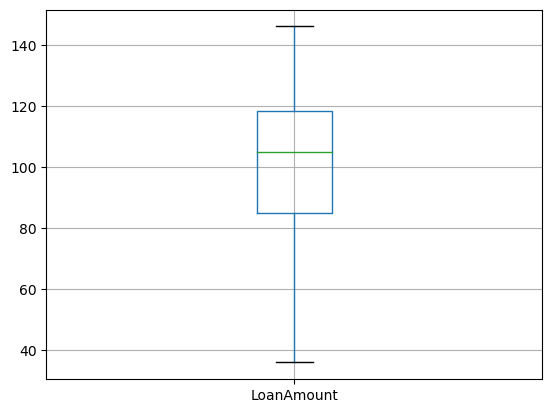

In [57]:
testdata.boxplot(column = 'LoanAmount')

<Axes: >

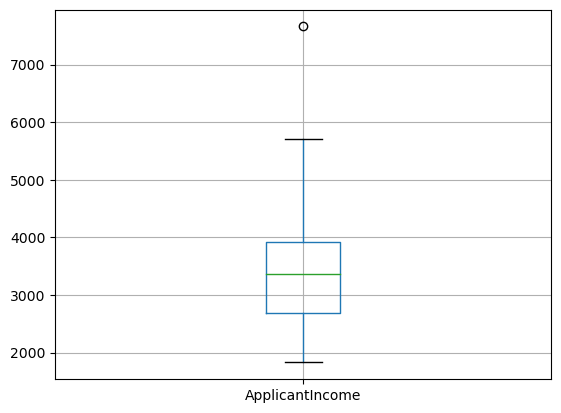

In [58]:
testdata.boxplot(column = 'ApplicantIncome')

In [59]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [60]:
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])

In [61]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [62]:
testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome_log'] = np.log(testdata['TotalIncome'])

In [63]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001032,Male,No,0,Graduate,No,4950.0,0.0,125,360.0,1.0,Urban,4.828314,4950.0,8.507143
1,LP001034,Male,No,1,Not Graduate,No,3596.0,0.0,100,240.0,1.0,Urban,4.605170,3596.0,8.187577
2,LP001036,Female,No,0,Graduate,No,3510.0,0.0,76,360.0,0.0,Urban,4.330733,3510.0,8.163371
3,LP001038,Male,Yes,0,Not Graduate,No,4887.0,0.0,133,360.0,1.0,Rural,4.890349,4887.0,8.494334
4,LP001041,Male,Yes,0,Graduate,No,2600.0,3500.0,115,360.0,1.0,Urban,4.744932,6100.0,8.716044


In [64]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            28 non-null     object 
 1   Gender             28 non-null     object 
 2   Married            28 non-null     object 
 3   Dependents         28 non-null     object 
 4   Education          28 non-null     object 
 5   Self_Employed      28 non-null     object 
 6   ApplicantIncome    28 non-null     float64
 7   CoapplicantIncome  28 non-null     float64
 8   LoanAmount         28 non-null     int64  
 9   Loan_Amount_Term   28 non-null     float64
 10  Credit_History     28 non-null     float64
 11  Property_Area      28 non-null     object 
 12  LoanAmount_log     28 non-null     float64
 13  TotalIncome        28 non-null     float64
 14  TotalIncome_log    28 non-null     float64
dtypes: float64(7), int64(1), object(7)
memory usage: 3.4+ KB


In [65]:
test = testdata.iloc[:, np.r_[1:15]].values

In [66]:
for i in range(0,5):
    test[:,i] = labelencoder_X.fit_transform(test[:,i])

In [67]:
test[:,10] = labelencoder_X.fit_transform(test[:,10])

In [68]:
test

array([[1, 0, 0, 0, 0, 4950.0, 0.0, 125, 360.0, 1.0, 2,
        4.8283137373023015, 4950.0, 8.507142855562735],
       [1, 0, 1, 1, 0, 3596.0, 0.0, 100, 240.0, 1.0, 2,
        4.605170185988092, 3596.0, 8.18757739559151],
       [0, 0, 0, 0, 0, 3510.0, 0.0, 76, 360.0, 0.0, 2, 4.330733340286331,
        3510.0, 8.163371316459912],
       [1, 1, 0, 1, 0, 4887.0, 0.0, 133, 360.0, 1.0, 0,
        4.890349128221754, 4887.0, 8.494333897270154],
       [1, 1, 0, 0, 0, 2600.0, 3500.0, 115, 360.0, 1.0, 2,
        4.74493212836325, 6100.0, 8.716044050161402],
       [1, 1, 0, 1, 0, 7660.0, 0.0, 104, 360.0, 0.0, 2,
        4.6443908991413725, 7660.0, 8.943767262734637],
       [1, 1, 0, 1, 0, 2600.0, 1911.0, 116, 360.0, 0.0, 1,
        4.7535901911063645, 4511.0, 8.414274137408396],
       [1, 0, 1, 0, 1, 4692.0, 0.0, 106, 360.0, 1.0, 0,
        4.663439094112067, 4692.0, 8.453614209773367],
       [1, 1, 0, 0, 0, 3500.0, 1667.0, 114, 360.0, 1.0, 1,
        4.736198448394496, 5167.0, 8.5500475282

In [69]:
test = ss.fit_transform(test)

In [70]:
pred = NBClassifier.predict(test)

In [71]:
pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0])